In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [79]:
train = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames - Train.csv')
dev = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames - Dev.csv')
test = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames-Test.csv')
full = pd.read_csv('/content/drive/MyDrive/DO_AN_Nèk:))/UIT-ViNames/UIT-ViNames - Full.csv')

In [80]:
# train
X_train = train['Full_Names']
y_train =  train['Gender']
# test
X_test = test['Full_Names']
y_test =   test['Gender']
# dev
X_dev =   dev['Full_Names']
y_dev =  dev['Gender']

In [81]:
!pip install underthesea
!pip install pyvi
!pip install viet_text_tools

In [82]:
from viet_text_tools import normalize_diacritics
import re 

In [83]:
#tiền xử lí dữ liệu
def pre_processing(text):
  #chuyển về chữ thường
  text = text.lower()
  #chuẩn hóa dấu thanh
  text = normalize_diacritics(text) 
  # xử lí khoản trắng kép
  text = " ".join(text.split())
  #xóa dấu các ký tự đặc biệt ở cuối
  text = re.sub(r'[^\w\s]', '', text)
  return text

In [84]:
# chuẩn hóa dataset với hàm pre_processing
for i in range(len(X_train)):
  X_train[i] = pre_processing(X_train[i])

for i in range(len(X_dev)):
  X_dev[i] = pre_processing(X_dev[i])

for i in range(len(X_test)):
  X_test[i] = pre_processing(X_test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [85]:
train['Full_Names'] = X_train 
dev['Full_Names']= X_dev
test['Full_Names'] = X_test

In [86]:
#cắt "họ" ra
Surname = [] 
for i in range(len(train['Full_Names'])):
  Surname.append(train['Full_Names'][i].split(" ",1)[0])
Surname
train['Surname'] = Surname
train['Surname']

0           ngô
1           bùi
2           lưu
3        nguyễn
4         dương
          ...  
18790      trần
18791      phan
18792      phạm
18793    nguyễn
18794    nguyễn
Name: Surname, Length: 18795, dtype: object

In [87]:
#cắt tên đệm + thật ra
Given_name= [] 
for i in range(len(train.Full_Names)):
  Given_name.append(train['Full_Names'][i].split(" ",1)[-1])
train['Given_name'] = Given_name
train['Given_name']

0                 xuân tùng
1             dương thảo vy
2                   thế huy
3                   thị vân
4                 minh long
                ...        
18790       nguyễn tường vy
18791                hải âu
18792    trương trúc phương
18793             diệu hiền
18794         đoàn thảo nhi
Name: Given_name, Length: 18795, dtype: object

In [88]:
#xử lí tập test
Surname = []
for i in range(len(test['Full_Names'])):
  Surname.append(test['Full_Names'][i].split(" ",1)[0])
Surname
test['Surname'] = Surname
test['Surname']

0       nguyễn
1           vũ
2       nguyễn
3           lê
4       nguyễn
         ...  
5365      đoàn
5366        ôn
5367    nguyễn
5368    nguyễn
5369     dương
Name: Surname, Length: 5370, dtype: object

In [89]:
# đệm + tên
Given_name = [] 
for i in range(len(test.Full_Names)):
  Given_name.append(test['Full_Names'][i].split(" ",1)[-1])
test['Given_name'] = Given_name
test['Given_name']

0            văn tiến
1           minh nhật
2          ngọc thành
3            văn tuấn
4           duy khánh
            ...      
5365      thị bảo thu
5366          hoa thu
5367    thị huỳnh như
5368    thị hồng phúc
5369          mỹ uyên
Name: Given_name, Length: 5370, dtype: object

In [90]:
#xử lí tập dev
Surname  = []
for i in range(len(dev['Full_Names'])):
  Surname.append(dev['Full_Names'][i].split(" ",1)[0])
Surname 
dev['Surname'] = Surname 
dev['Surname']

0         trần
1          hứa
2       nguyễn
3       nguyễn
4       nguyễn
         ...  
2681        lê
2682       ngô
2683    nguyễn
2684        võ
2685        lê
Name: Surname, Length: 2686, dtype: object

In [91]:
#đệm + tên
Given_name = []  
for i in range(len(dev.Full_Names)):
  Given_name.append(dev['Full_Names'][i].split(" ",1)[-1])
dev['Given_name'] = Given_name
dev['Given_name']

0              thanh tâm
1              phước lợi
2             tuyết thảo
3             quang tiến
4        thị thảo nguyên
              ...       
2681              văn đô
2682          minh phong
2683    ngọc quang thịnh
2684          ngọcthi ân
2685        thị kim thùy
Name: Given_name, Length: 2686, dtype: object

In [92]:
# sắp xếp lại cho đúng thứ tự => chỉ đối với tập train 
columns_title =  ['Surname','Given_name','Full_Names','Gender','checked']
train=train.reindex(columns=columns_title)
columns_title =  ['Surname','Given_name','Full_Names','Gender','checked']
test=test.reindex(columns=columns_title)
columns_title =  ['Surname','Given_name','Full_Names','Gender','checked']
dev=dev.reindex(columns=columns_title)

In [93]:
X_train = train['Given_name']
X_test = test['Given_name']
X_dev = dev['Given_name']

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer =TfidfVectorizer()
TF_vectorizer =TfidfVectorizer.fit(X_train)
X_train = TF_vectorizer.transform(X_train).toarray()
X_test = TF_vectorizer.transform(X_test).toarray()
X_dev  = TF_vectorizer.transform(X_dev).toarray()

In [95]:
# y train 
y_train = train['Gender']
# y test
y_test = test['Gender']

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#LogisticRegression

In [97]:
 from sklearn.linear_model import LogisticRegression

In [98]:
import time 
# fit the training dataset on the classifier
start_time = time.time()
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 2.587538957595825 để huấn luyện mô hình ----


In [99]:
prediction_LogisticRegression=clf.predict(X_test)

In [100]:
print("LogisticRegression Accuracy Score -> ",accuracy_score(prediction_LogisticRegression, y_test)*100)

LogisticRegression Accuracy Score ->  95.3631284916201


In [101]:
print("LogisticRegression F1-score: ", f1_score(prediction_LogisticRegression,y_test,average='macro')*100)

LogisticRegression F1-score:  95.23902455281535


In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction_LogisticRegression))
print(confusion_matrix(y_test, prediction_LogisticRegression))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370

[[2127  162]
 [  87 2994]]


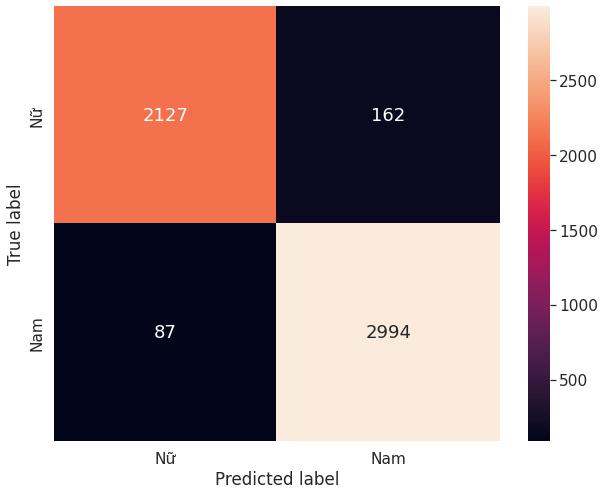

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test, prediction_LogisticRegression) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Naive_bayes


In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
import time
# fit the training dataset on the classifier
start_time = time.time()
clf = MultinomialNB()
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 0.0881342887878418 để huấn luyện mô hình ----


In [106]:
predictions_NV = clf.predict(X_test)
print("Naive_bayes Accuracy Score -> ",accuracy_score(predictions_NV, y_test)*100)

Naive_bayes Accuracy Score ->  94.43202979515829


In [107]:
print("Naive_bayes f1 Score -> ",f1_score(predictions_NV, y_test ,average='macro')*100)

Naive_bayes f1 Score ->  94.30075418823381


In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_NV))
print(confusion_matrix(y_test,predictions_NV))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2289
           1       0.95      0.96      0.95      3081

    accuracy                           0.94      5370
   macro avg       0.94      0.94      0.94      5370
weighted avg       0.94      0.94      0.94      5370

[[2128  161]
 [ 138 2943]]


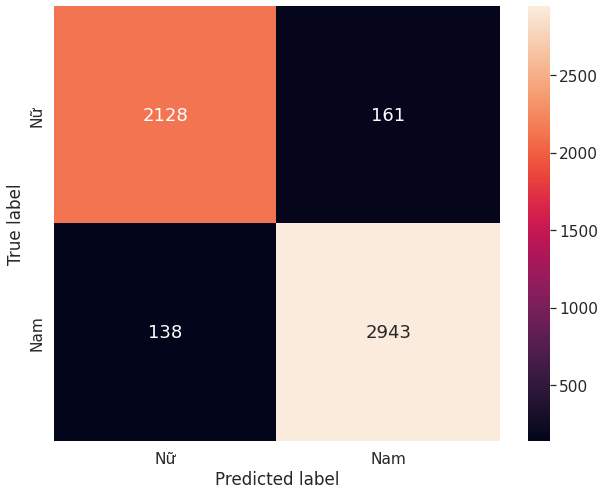

In [109]:
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test,predictions_NV) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
import time

# fit the training dataset on the classifier
start_time = time.time()

clf = DecisionTreeClassifier(random_state=0,max_depth=65)
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 14.601274251937866 để huấn luyện mô hình ----


In [112]:
# predict the labels on test dataset
predictions_DT = clf.predict(X_test)
# Use accuracy_score function to get the accuracy
print("DecisionTree Accuracy Score -> ",accuracy_score(predictions_DT , y_test)*100)

DecisionTree Accuracy Score ->  94.04096834264432


In [113]:
print("DecisionTree F1-score: ", f1_score(predictions_DT,y_test,average='macro')*100)

DecisionTree F1-score:  93.88930423413183


In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_DT))
print(confusion_matrix(y_test, predictions_DT))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2289
           1       0.94      0.96      0.95      3081

    accuracy                           0.94      5370
   macro avg       0.94      0.94      0.94      5370
weighted avg       0.94      0.94      0.94      5370

[[2102  187]
 [ 133 2948]]


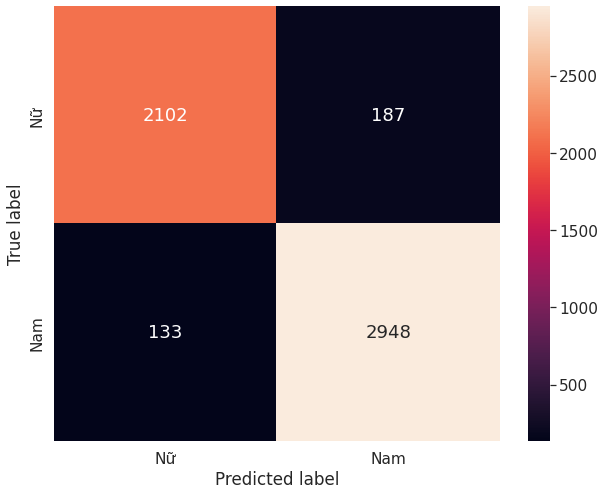

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)

# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_DT) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#SVM

In [116]:
from sklearn import svm

In [ ]:
import time 
# fit the training dataset on the classifier
start_time = time.time()

SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM.fit(X_train,y_train)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 74.35950803756714 để huấn luyện mô hình ----


In [ ]:
# predict the labels on test dataset
predictions_SVM = SVM.predict(X_test) #y_test_pred = f(x_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM , y_test)*100)

In [ ]:
print(" SVM F1-score -> ", f1_score(predictions_SVM, y_test, average='macro')*100)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_SVM))
print(confusion_matrix(y_test, predictions_SVM))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_SVM) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import time 
# fit the training dataset on the classifier
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)
print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

In [ ]:
predictions_random_fr=clf.predict(X_test)

In [ ]:
print("RandomForestClassifier Accuracy Score -> ",accuracy_score(predictions_random_fr , y_test)*100)

In [ ]:
print("RandomForestClassifier F1-score: ", f1_score(predictions_random_fr,y_test,average='macro')*100)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_random_fr))
print(confusion_matrix(y_test, predictions_random_fr))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_random_fr) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Nữ','Nam'], 
                     columns = ['Nữ','Nam'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()